<h1>Capstone Project — The Battle of Neighbourhoods</h1>
<h2>Introduction</h2>
New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
<h2>Questions that can be asked using the above mentioned datasets</h2>
What is best location in New Delhi City for Chinese Cuisine ?
Which areas have large number of Chinese Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Chinese Cuisine ?
What places are have best restaurant in New Delhi?
<h2>Data</h2>
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.
<h2>Approach</h2>
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)


In [2]:

import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans



In [3]:
!pip install folium

In [4]:
import folium

In [5]:
!pip install geocoder

In [6]:
import geocoder


<h2>Read the zomato resturant data from csv file</h2>

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [8]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

<h2>Data Cleaning
remove the unwanted columns and rows from dataset</h2>

In [9]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [10]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [11]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

<h2>Create map to show the restaurant cluters</h2>

In [12]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [13]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

<h1>What places are have best restaurant in New Delhi?</h1>

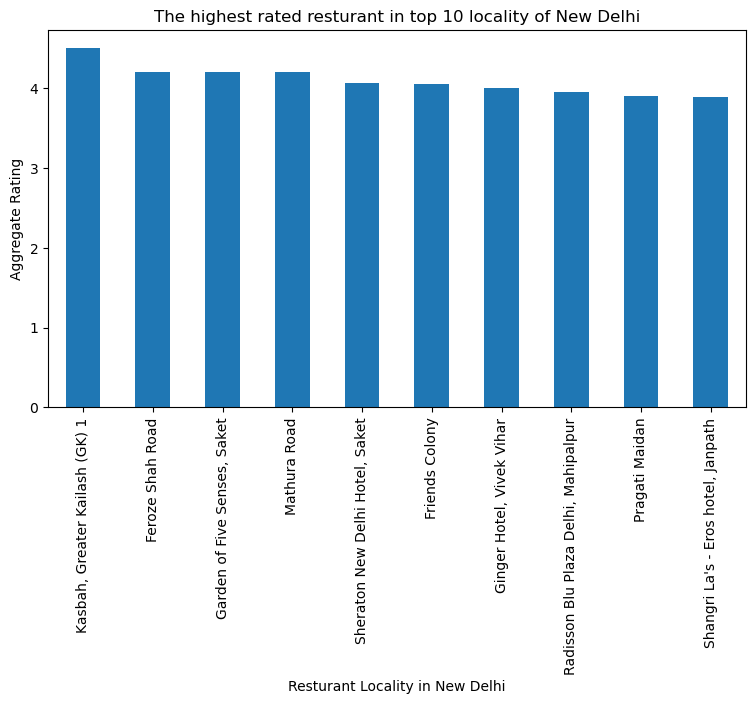

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

<h1>What places are have worst restaurants in New Delhi?</h1>

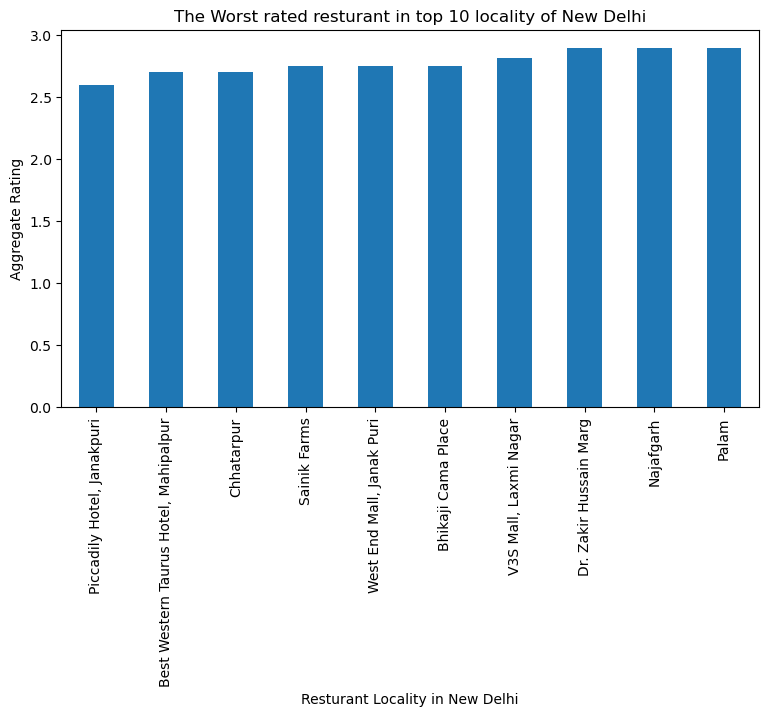

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

<h1>Which place are suitable for edible person in New Delhi city?</h1>

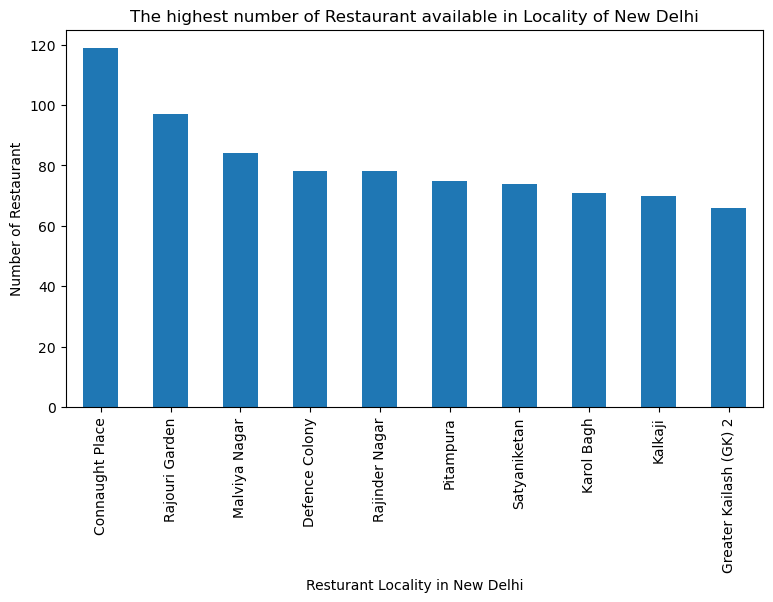

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<h1>Which place are not suitable for edible person in New Delhi city?</h1>

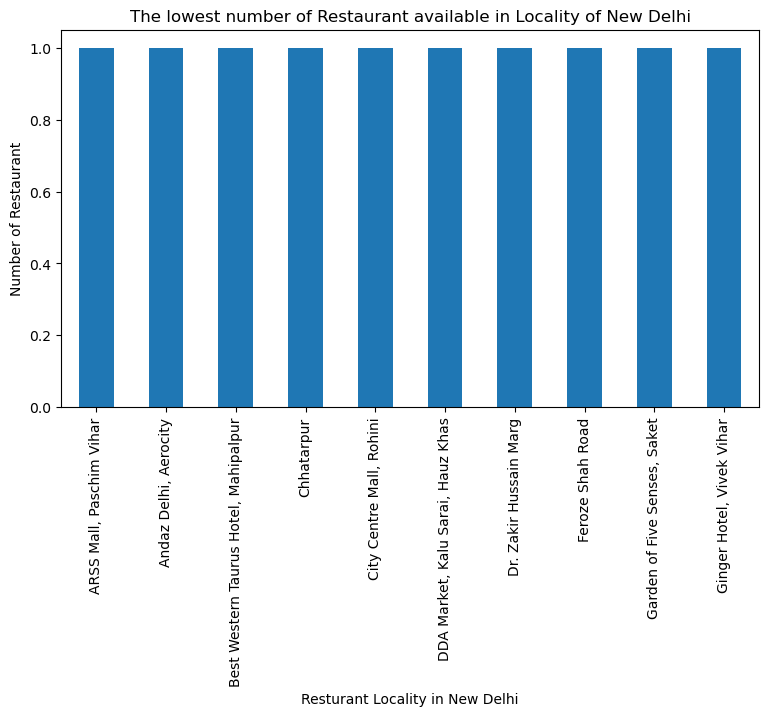

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<h1>What are the best places for chinese restaurant in New Delhi city</h1>

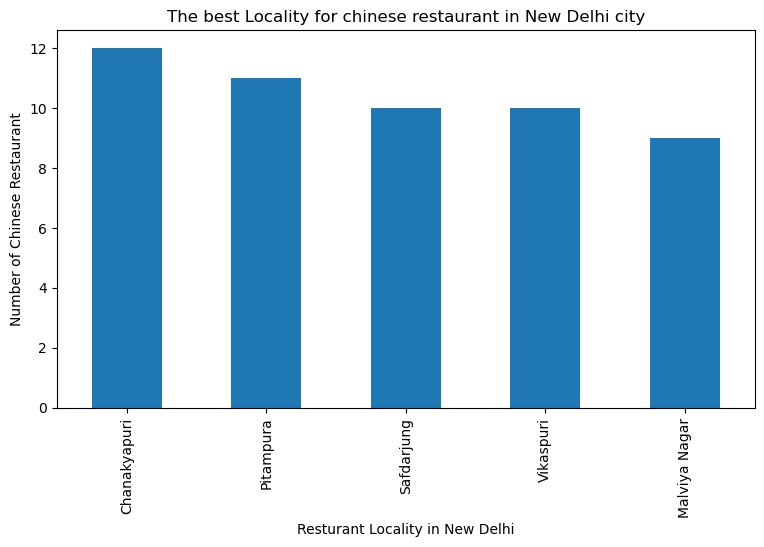

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()



<h4>Chanakyapuri is the best place for Chinese restaurant.</h4>

<h2>which places are the best chinese resturants in New Delhi?</h2>

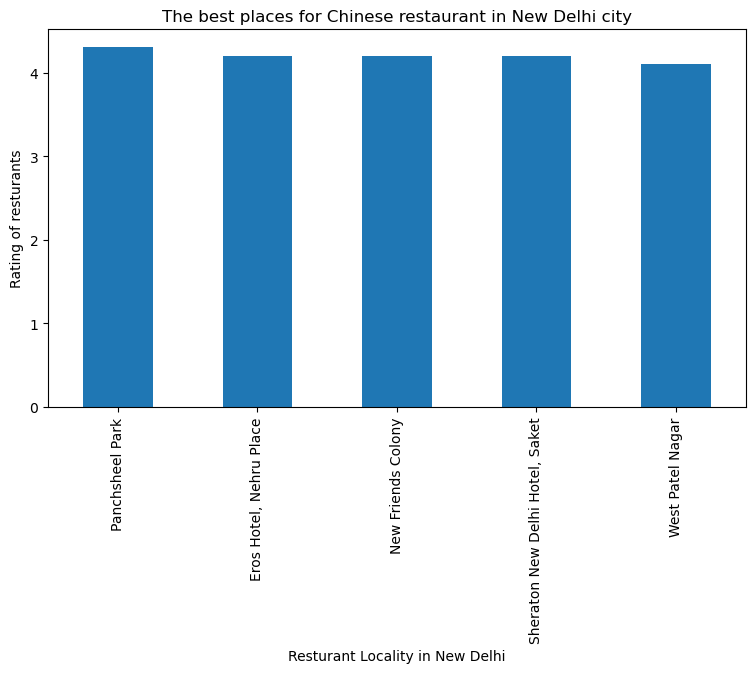

In [19]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<h4>Panchsheel park is best Chinese resturants.</h4>

<h3>Data transformation
Based on Locality grouping the data</h3>

In [20]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [21]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [22]:
df_final.shape

(240, 8)

<h2>Define Foursquare Credentials and Version</h2>

In [23]:
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


<h2>Create a function to repeat the same process to all the Locality in New Delhi</h2>

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h2>Find the venues in all New Delhi Locality</h2>

In [25]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [26]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [28]:
new_Delhi_venues.groupby('Locality').count()


Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 13                  13     13   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          30                  30     30   
Yusuf Sarai                                    11                  11     11   
ibis New Delhi, Aerocity                       28                  28     28   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              13               13   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       30               30   
Yusuf Sarai                                 11               11   
ibis New Delhi, Aerocity                    28               28   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              13  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       30  
Yusuf Sarai                                 11  
ibis New Delhi, Aerocity                    28  

[239 rows x 6 columns]

In [29]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 206 uniques categories.


In [30]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Andhra Restaurant  ...  Trail  Train Station  \
0                    0                  0  ...      0              0   
1                    0                  0  ...      0              0   
2                    0                  0  ...      0              0   
3                    0                  0  ...      0              0   
4                    0                  0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 207 columns]

In [31]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
234  West Gate Mall, Rajouri Garden  0.000000           0.000000   
235                West Patel Nagar  0.000000           0.000000   
236           Worldmark 1, Aerocity  0.000000           0.033333   
237                     Yusuf Sarai  0.000000           0.000000   
238        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport Lounge  Airport Service  \
0                  0.0                 0.0        0.000000              0.0   
1                  0.0                 0.0        0.000000              0.0   
2                  0.0                 0.0        0.000000              0.0   
3                  0.0                 0.0        0.142857              0.0   
4                  0.0                 0.0        0.000000              0.0   
..                 ...                 ...             ...              ...   
234                0.0                 0.0        0.000000              0.0   
235                0.0                 0.0        0.000000              0.0   
236                0.0                 0.0        0.000000              0.0   
237                0.0                 0.0        0.000000              0.0   
238                0.0                 0.0        0.000000              0.0   

     Airport Terminal  American Restaurant  Andhra Restaurant  ...  Trail  \
0            0.000000             0.000000                0.0  ...    0.0   
1            0.000000             0.000000                0.0  ...    0.0   
2            0.000000             0.000000                0.0  ...    0.0   
3            0.142857             0.000000                0.0  ...    0.0   
4            0.000000             0.000000                0.0  ...    0.0   
..                ...                  ...                ...  ...    ...   
234          0.000000             0.076923                0.0  ...    0.0   
235          0.000000             0.000000                0.0  ...    0.0   
236          0.000000             0.000000                0.0  ...    0.0   
237          0.000000             0.000000                0.0  ...    0.0   
238          0.000000             0.000000                0.0  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
234       0.000000                 0.0               0.0   
235       0.000000                 0.0               0.0   
236       0.033333                 0.0               0.0   
237       0.000000                 0.0               0.0   
238       0.035714                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
234                            0.0                    0.0         0.0   
235                            

In [32]:

New_Delhi_grouped.shape

(239, 207)

In [33]:
num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café   0.4
1  Indian Restaurant   0.2
2                Pub   0.2
3         Restaurant   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2      Shopping Mall   0.2
3          Multiplex   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3      Airport Terminal  0.14
4   Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store  0.25
1  Fast Food Restaurant  0.25
2    Chinese Restaurant  0.25
3                  Café  0.25
4                Office  0.0

4  Chinese Restaurant  0.07


----DLF Promenade Mall, Vasant Kunj----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.07
2    Asian Restaurant  0.07
3                Café  0.07
4       Shopping Mall  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant   0.3
1  Fast Food Restaurant   0.2
2           Pizza Place   0.1
3                Market   0.1
4          Dessert Shop   0.1


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.31
1             Hostel  0.15
2         Restaurant  0.15
3              Hotel  0.15
4               Road  0.08


----Defence Colony----
                venue  freq
0  Italian Restaurant  0.16
1   Indian Restaurant  0.16
2         Coffee Shop  0.11
3                Café  0.11
4              Bakery  0.11


----Delhi University-GTB Nagar----
                     venue  freq
0                     Café  0.27
1       Italian Restaurant  0.09
2  North Indian Restaurant  

4              Lounge  0.06


----Jasola----
            venue  freq
0     Pizza Place   0.2
1    Soccer Field   0.2
2  Sandwich Place   0.2
3            Café   0.2
4  Soccer Stadium   0.2


----Jaypee Siddharth, Rajendra Place----
                            venue  freq
0            Fast Food Restaurant  0.18
1                     Pizza Place  0.12
2  Multicuisine Indian Restaurant  0.06
3                           Hotel  0.06
4               Convenience Store  0.06


----Jaypee Vasant Continental, Vasant Vihar----
                  venue  freq
0                  Café  0.14
1           Pizza Place  0.07
2  Fast Food Restaurant  0.07
3            Restaurant  0.07
4           Coffee Shop  0.07


----Jor Bagh----
                         venue  freq
0                Metro Station  0.25
1            Indian Restaurant  0.25
2                  Record Shop  0.25
3                       Bakery  0.25
4  Northeast Indian Restaurant  0.00


----Kailash Colony----
                venue  freq
0   

               venue  freq
0         Playground   0.2
1          Pool Hall   0.2
2  Convenience Store   0.2
3               Lake   0.2
4         Food Truck   0.2


----Model Town 2----
                  venue  freq
0            Donut Shop  0.14
1           Pizza Place  0.14
2    Frozen Yogurt Shop  0.14
3           Coffee Shop  0.14
4  Fast Food Restaurant  0.14


----Model Town 3----
                            venue  freq
0               Indian Restaurant   0.5
1                            Park   0.5
2                             ATM   0.0
3         North Indian Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Moments Mall, Kirti Nagar----
                  venue  freq
0         Metro Station  0.17
1        Clothing Store  0.08
2  Fast Food Restaurant  0.08
3            Donut Shop  0.08
4            Sports Bar  0.08


----Moti Bagh----
                     venue  freq
0         Department Store   0.2
1              Pizza Place   0.2
2                   Arcade   0.2
3  S

4        Nightlife Spot   0.0


----Satyaniketan----
           venue  freq
0           Café  0.33
1          Plaza  0.17
2         Bistro  0.17
3  Deli / Bodega  0.17
4    Snack Place  0.17


----Sector 15, Dwarka----
                            venue  freq
0              Light Rail Station   0.5
1                   Train Station   0.5
2                             ATM   0.0
3         North Indian Restaurant   0.0
4  Multicuisine Indian Restaurant   0.0


----Select Citywalk Mall, Saket----
                venue  freq
0   Indian Restaurant  0.11
1              Lounge  0.07
2                 Bar  0.07
3      Clothing Store  0.07
4  Chinese Restaurant  0.07


----Shahdara----
                         venue  freq
0                          ATM  0.25
1            Convenience Store  0.25
2                         Park  0.25
3               Chocolate Shop  0.25
4  Northeast Indian Restaurant  0.00


----Shahpur Jat----
                   venue  freq
0                    Bar  0.29
1     Chin

4  North Indian Restaurant  0.00


----Uday Park----
                  venue  freq
0         Metro Station  0.17
1           Music Venue  0.17
2                  Park  0.17
3                Market  0.17
4  Fast Food Restaurant  0.17


----Unity One Mall, Janakpuri----
               venue  freq
0     Sandwich Place  0.25
1        Pizza Place  0.12
2  Indian Restaurant  0.12
3    Business Center  0.12
4        Coffee Shop  0.12


----Uttam Nagar----
               venue  freq
0  Indian Restaurant  0.50
1                ATM  0.25
2  Accessories Store  0.25
3           Wine Bar  0.00
4          Nightclub  0.00


----V3S Mall, Laxmi Nagar----
                  venue  freq
0           Pizza Place  0.06
1  Fast Food Restaurant  0.06
2             Gift Shop  0.06
3            Playground  0.06
4             Multiplex  0.06


----Vasant Kunj----
                           venue  freq
0                    Pizza Place  0.14
1                   Dessert Shop  0.14
2                            Spa  

In [34]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura                  Café   
..                              ...                   ...   
234  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
235                West Patel Nagar           Pizza Place   
236           Worldmark 1, Aerocity                 Hotel   
237                     Yusuf Sarai     Indian Restaurant   
238        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1       Indian Restaurant                   Pub   
2           Shopping Mall             Multiplex   
3     Rental Car Location        Airport Lounge   
4    Fast Food Restaurant    Chinese Restaurant   
..                    ...                   ...   
234                  Café           Pizza Place   
235  Fast Food Restaurant              Pharmacy   
236                   Spa     Indian Restaurant   
237           Coffee Shop                   Bar   
238     Indian Restaurant                   Spa   

              4th Most Common Venue      5th Most Common Venue  \
0    Multicuisine Indian Restaurant                Coffee Shop   
1                        Restaurant              Women's Store   
2                 Indian Restaurant                      Hotel   
3                  Airport Terminal                Coffee Shop   
4                  Department Store     Furniture / Home Store   
..                              ...                        ...   
234                      Hookah Bar                     Garden   
235               Indian Restaurant  Indian Chinese Restaurant   
236                 Bed & Breakfast                Coffee Shop   
237             Japanese Restaurant                       Park   
238                     Coffee Shop              Shopping Mall   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Chinese Restaurant                   ATM           Pizza Place   
1     Fried Chicken Joint     French Restaurant            Food Truck   
2                    Café    African Restaurant  Fast Food Restaurant   
3    Fast Food Restaurant        Farmers Market    Frozen Yogurt Shop   
4      Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
..                    ...                   ...                   ...   
234             Multiplex    Chinese Restaurant            Restaurant   
235    Frozen Yogurt Shop     French Restaurant            Food Truck   
236    Punjabi Restaurant                Bakery                  Café   
237      Asian Restaurant                 Hotel     Korean Restaurant   
238            Restaurant                Bakery       Bed & Breakfast   

    9th Most Common Venue  10th Most Common Venue  
0                  Garden  Furniture / Home Store  
1              Food Court       Food & Drink Shop  
2     Fried Chicken Joint       French Restaurant  
3     Fried Chicken Joint       French Restaurant  
4              Food Truck              Food Court  
..                    ...                     ...  
234     Indian Restaurant     American Restaurant  
235            Food Court       Food & Drink Shop  
236          Cocktail Bar           Shopping Mall  
237                Lounge                    Food  
238                  Café                  Lounge  

[239 rows x 11 columns]

In [36]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [38]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

<ipython-input-38-31180001c6d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_Delhi_merged['Cluster Labels'] = kmeans.labels_


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               1   
2                   Average, Good          434               0   
3                         Average           59               3   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1                  Café     Indian Restaurant                   Pub   
2           Pizza Place         Shopping Mall             Multiplex   
3                 Hotel   Rental Car Location        Airport Lounge   
4                  Café  Fast Food Restaurant    Chinese Restaurant   

            4th Most Common Venue   5th Most Common Venue  \
0  Multicuisine Indian Restaurant             Coffee Shop   
1                      Restaurant           Women's Store   
2               Indian Restaurant                   Hotel   
3                Airport Terminal             Coffee Shop   
4                Department Store  Furniture / Home Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Chinese Restaurant                   ATM           Pizza Place   
1   Fried Chicken Joint     French Restaurant            Food Truck   
2                  Café    African Restaurant  Fast Food Restaurant   
3  Fast Food Restaurant        Farmers Market    Frozen Yogurt Shop   
4    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

  9th Most Common Venue  10th Most Common Venue  
0                Garden  Furniture / Home Store  
1            Food Court       Food & Drink Shop  
2   Fried Chicken Joint       French Restaurant  
3   Fried Chicken Joint       French Restaurant  
4            Food Truck              Food Court

In [39]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
0    28.668945    3.100000                         Average          117   
2    28.656131    3.275000                   Average, Good          434   
12   28.641698    3.050000                         Average           17   
13   28.690182    3.090000             Average, Good, Poor          971   
16   28.630440    3.208333             Average, Good, Poor         1779   
23   28.656414    3.358182        Average, Good, Very Good         6668   
25   28.495624    2.700000                         Average           23   
33   28.657388    3.320000                   Average, Good          636   
42   28.576161    2.983333             Average, Good, Poor          542   
43   28.643320    3.287500  Average, Good, Poor, Very Good         2570   
49   28.602169    2.900000                         Average            7   
55   28.617102    4.200000                       Very Good         3010   
61   28.668181    3.400000                         Average           33   
65   28.556980    3.272414             Average, Good, Poor         5243   
66   28.699373    3.252174                   Average, Good          973   
71   28.641003    3.650000                   Average, Good          367   
72   28.705700    3.350000                   Average, Good          278   
77   28.631728    3.060714  Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500             Average, Good, Poor          609   
84   28.630942    3.122000  Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111        Average, Good, Very Good         7411   
92   28.584294    3.100000                         Average           35   
97   28.662972    3.533333              Average, Very Good          293   
98   28.651527    3.490909        Average, Good, Very Good         3222   
99   28.648795    3.238028  Average, Good, Poor, Very Good         7282   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
113  28.541242    2.984615                         Average          817   
116  28.486576    2.950000                         Average            8   
118  28.646549    3.200000                         Average           20   
126  28.602860    2.973214             Average, Good, Poor         1831   
133  28.708185    3.344444        Average, Good, Very Good          568   
140  28.627959    3.004167                         Average          326   
144  28.591092    3.200000             Average, Good, Poor          993   
153  28.608055    3.860000        Average, Good, Very Good         7978   
156  28.630734    3.185714                   Average, Good          244   
160  28.712975    3.066667                         Average          121   
165  28.539464    2.900000                         Average           14   
173  28.714176    3.352083  Average, Good, Poor, Very Good         4514   
199  28.601779    3.700000        Average, Good, Very Good          964   
202  28.646593    3.280952        Average, Good, Very Good         1624   
204  28.597038    3.533333        Average, Good, Very Good          902   
209  28.631362    3.537500                   Average, Good         1666   
211  28.579556    3.780000                            Good          709   
212  28.592147    3.350000                   Average, Good          189   
215  28.605069    3.785714        Average, Good, Very Good         1976   
223  28.619954    2.905714                   Average, Poor          242   
237  28.550257    3.220000                   Average, Good           77   

     Cluster Labels   1st Most Common Venue 2nd Most Common Venue  \
0                 0       Indian Restaurant        Sandwich Place   
2                 0             Pizza Place         Shopping Mall   
12                0                  Hostel      Asian Restaurant   
13                0             Pizza Place             BBQ Joint   
16                0       Indian Restaurant                 Hotel

In [41]:

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
4    28.690020    3.033333                              Average          126   
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
..         ...         ...                                  ...          ...   
227  28.559704    3.278261             Average, Good, Very Good         1043   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
230  28.658041    3.400000                              Average           19   
232  28.667344    3.077273                  Average, Good, Poor          939   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1                 1                  Café     Indian Restaurant   
4                 1                  Café  Fast Food Restaurant   
6                 1                Market           Coffee Shop   
7                 1           Coffee Shop         Shopping Mall   
8                 1               Stadium                  Café   
..              ...                   ...                   ...   
227               1                  Café           Coffee Shop   
228               1           Snack Place         Women's Store   
229               1                  Café              Tea Room   
230               1        Cosmetics Shop                  Café   
232               1             Juice Bar       Bed & Breakfast   

    3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
1                     Pub            Restaurant            Women's Store   
4      Chinese Restaurant      Department Store   Furniture / Home Store   
6       Food & Drink Shop            Steakhouse  New American Restaurant   
7    Fast Food Restaurant    Italian Restaurant           Clothing Store   
8            Dessert Shop         Metro Station                    Hotel   
..                    ...                   ...                      ...   
227  Fast Food Restaurant    Chinese Restaurant               Restaurant   
228        Cosmetics Shop    Frozen Yogurt Shop      Fried Chicken Joint   
229           Cheese Shop  Fast Food Restaurant                   Bakery   
230                  Park          Burger Joint            Burrito Place   
232    Athletics & Sports         Women's Store        Fish & Chips Shop   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1        Fried Chicken Joint     French Restaurant            Food Truck   
4         Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
6             Farmers Market   Fried Chicken Joint     French Restaurant   
7           Asian Restaurant                  Café     Indian Restaurant   
8                Coffee Shop  Other Great Outdoors           Golf Course   
..                       ...                   ...                   ...   
227             Gourmet Shop                Market                   Pub   
228        French Restaurant            Food Truck            Food Court   
229  North Indian Restaurant           Coffee Shop    Chinese Restaurant   
230              Bus Station           Art Gallery           Snack Place   
232   Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

    9th Most Common Venue 10th Most Common Venue  
1              Food Court      Food & Drink Shop  
4              Food Truck             Food Court  
6              Food Truck             Food Court  
7      Chinese Restaurant              Bookstore  
8             Music Venue      French Restaurant  
..                    ...                    ...  
227              Tea Room          Movie Theater  
228     Foo

In [42]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
146  28.53504       3.175  Average, Good           60               2   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
146            Restaurant         Women's Store        Farmers Market   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
146    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
146            Food Truck            Food Court     Food & Drink Shop   

    10th Most Common Venue  
146                   Food

In [43]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
125  28.627715    3.125000                        Average, Good          171   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
210  28.661133    3.775000                      Good, Very Good          460   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
220  28.523519    3.700000                                 Good          281   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 3                 Hotel       Rental Car Location   
10                3                 Hotel         Indian Restaurant   
19                3                 Hotel        Italian Restaurant   
35                3                 Hotel               Pizza Place   
56                3                 Hotel                      Café   
60                3                 Hotel          Asian Restaurant   
69                3                 Hotel                       Spa   
70                3                 Hotel                Restaurant   
74                3                 Hotel         Indian Restaurant   
83                3                 Hotel         Indian Restaurant   
111               3                 Hotel                Restaurant   
112               3                 Hotel         Indian Restaurant   
119               3                 Hotel         Indian Restaurant   
120               3    Italian Restaurant         Indian Restaurant   
125               3            Restaurant                    Garden   
128               3                 Hotel   Health & Beauty Service   
149               3                 Hotel         Indian Restaurant   
162               3                  Café                     Hotel   
163               3                 Hotel         Indian Restaurant   
168               3     Indian

In [44]:
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
5    28.700516    3.040000             Average, Good, Poor          594   
14   28.693969    3.378571                   Average, Good         2343   
15   28.691136    3.390909        Average, Good, Very Good          485   
18   28.696302    3.300000                   Average, Good          415   
22   28.654105    3.085714                         Average           80   
34   28.720602    3.600000                            Good          119   
36   28.692546    3.480000                   Average, Good          948   
48   28.630149    2.950000             Average, Good, Poor          471   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
90   28.642755    3.450000                   Average, Good          322   
94   28.538153    3.117143             Average, Good, Poor         3642   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
142  28.693270    3.519149        Average, Good, Very Good         7642   
152  28.544464    3.525000              Average, Very Good          231   
155  28.669160    3.148214             Average, Good, Poor         2735   
157  28.629505    2.600000                         Average           67   
161  28.639872    3.134483             Average, Good, Poor         1481   
170  28.643757    3.575000                   Average, Good         2879   
181  28.571849    3.316667                   Average, Good          472   
188  28.707685    3.168182        Average, Good, Very Good         1668   
193  28.569983    3.133333             Average, Good, Poor          988   
194  28.566717    3.303125        Average, Good, Very Good         2411   
219  28.638846    3.048148                   Average, Good          290   
222  28.628988    3.260000             Average, Good, Poor          239   
225  28.524070    3.686364        Average, Good, Very Good         4001   
231  28.637492    3.062264             Average, Good, Poor         1253   
233  28.695096    3.050000                         Average           86   
234  28.630044    2.750000                   Average, Poor          238   
235  28.652978    3.500000                            Good          178   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 4           Pizza Place        Ice Cream Shop   
14                4           Pizza Place      Asian Restaurant   
15                4  Gym / Fitness Center           Pizza Place   
18                4           Pizza Place      Asian Restaurant   
22                4           Pizza Place                   Gym   
34                4           Pizza Place        Clothing Store   
36                4     Indian Restaurant         Shopping Mall   
48                4     Indian Restaurant        Sandwich Place   
50                4           Pizza Place           Coffee Shop   
57                4           Pizza Place            Food Truck   
73                4           Pizza Place                  Café   
90                4  Fast Food Restaurant           Pizza Place   
94                4                Market  Fast Food Restaurant   
101               4           Pizza Place   American Restaurant   
103               4                   ATM     Convenience Store   
104               4           Pizza Place                  Park   
130               4           Pizza Place         Shopping Mall   
132               4           Pizza Place    Frozen Yogurt Shop   
142               4     Indian Restau

<h2>Conclusion</h2>
1.Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
2.Pancsheel park, Nehru place have the best Chinese Resturant.
3.Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
4.Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Indian Restaurants. #### Cluster 2: It is most recommended for Hotels and nightclub. #### Cluster 3 and Cluster 5: It is most recommended for Fast food. #### Cluster 4: It is most recommended for the cafe and pizza.